<a href="https://colab.research.google.com/github/kimqkr4/submission/blob/main/9%EC%A3%BC%EC%B0%A8ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

# 퍼셉트론(Perceptron)

<br>

<br>

- 입력(Feature) 데이터  $x = \begin{bmatrix}1\\ x_1\\ \vdots\\ x_d \end{bmatrix}      \quad  \quad $weights $\omega = \begin{bmatrix}\omega_0 \\ \omega_1 \\ \vdots\\ \omega_d \end{bmatrix}$

<br>

- 분류경계선(decision boundary) f(x)  : feature x 와 weight w 선형조합(linear combination)

<br>
$$f(x) = \omega_0 + \omega^Tx  = \omega_0 + \omega_1x_1 + \cdots + w_d x_d = 0 \qquad (x_0 = 1)$$
<br>

$$\begin{align*} \text{If} \;
& \sum\limits_{i=1}^{d}\omega_ix_i > \text{threshold}, --> 1\\
\text{If} \;
& \sum\limits_{i=1}^{d}\omega_ix_i < \text{threshold}. --> -1
\end{align*}$$

<br><br>

$$h(x) = \text{sign} \left(\left( \sum\limits_{i=1}^{d}\omega_ix_i \right)- \text{threshold} \right) = \text{sign}\left(\left( \sum\limits_{i=1}^{d}\omega_ix_i \right)+ \omega_0\right) = \text{sign}\left( \sum\limits_{i=0}^{d}\omega_ix_i \right)$$
<br>
<br>

- Sign function :

<br>
$$
\text{sign}(x) =
\begin{cases}
1, &\text{if }\; x > 0\\
0, &\text{if }\; x = 0\\
-1, &\text{if }\; x < 0
\end{cases} $$

- vector form
<br>

$$h(x) = \text{sign}\left( \omega^T x \right)$$

<br>

__Perceptron Diagram__
<br><br>
<center>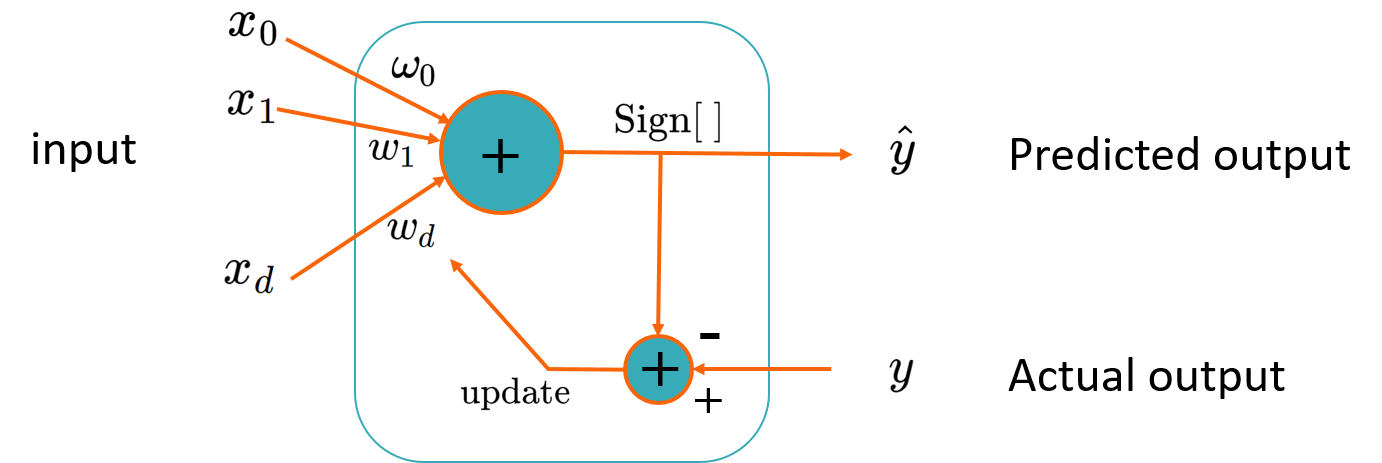</center>
<br><br>


<br>

# Perceptron Algorithm

<br>

- The perceptron 예측함수  $$ \quad  \hat{y} = h(x) = \text{sign}\left( \omega^Tx \right)$$

<br>

- 학습 데이터 set

$$(x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N) \quad \text{where } y_i \in \{-1,1\}$$

<br>

1. 예측값과 실제값이 서로 다른 점만 선택해서 w를 업데이트

<br>
$$ \hat{y} =\text{sign}\left(\omega^Tx_n \right) \neq y_n$$

<br>

2. Weight vector w값을 반복적으로 업데이트

<br>

$$\omega \leftarrow \omega + y_nx_n$$
<br>


<br>

__Perceptron Updates 증명__

<br>

- Let's look at a misclassified positive example ($y_n = +1$)
  - perceptron (wrongly) thinks $\omega_{old}^T x_n < 0$

<br>

- Updates would be

<br>

$$ \begin{align*}\omega_{new} &= \omega_{old} + y_n x_n = \omega_{old} + x_n \\ \\
\omega_{new}^T x_n &= (\omega_{old} + x_n)^T x_n = \omega_{old}^T x_n + x_n^T x_n  \geq \omega_{old}^T x_n \end{align*}$$

<br>

- Thus $\omega_{new}^T x_n$ is <font color='red'>less negative</font> than $\omega_{old}^T x_n$

<br>

# Perceptron in Python


$$f(x) = \omega_0 + \omega^Tx  = \omega_0 + \omega_1x_1 + \omega_2x_2  = 0 \qquad (x_0 = 1)$$

<br>

$$
\begin{align*}
\omega &= \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix} \qquad
x = \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T\\ \vdots \\ \left(x^{(m)}\right)^T \end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)}\\\vdots & \vdots & \vdots \\ 1 & x_1^{(m)} & x_2^{(m)}\end{bmatrix} \qquad
y = \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ y^{(3)}\\ \vdots \\ y^{(m)} \end{bmatrix}
\end{align*}$$

<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#training data gerneration
m = 100
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

f = 0.8*x1 + x2 - 3

In [3]:
C1 = np.where(f >= 1)
C0 = np.where(f < -1)
print(C1)
print(C0)

(array([ 1,  2,  3,  6,  8, 12, 20, 23, 34, 41, 44, 45, 48, 51, 52, 57, 60,
       62, 64, 65, 66, 71, 72, 74, 75, 78, 81, 82, 86, 89, 96]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0]))
(array([ 0,  4,  5, 10, 13, 15, 18, 21, 24, 26, 28, 29, 30, 31, 32, 35, 39,
       40, 42, 46, 49, 50, 53, 54, 56, 58, 63, 68, 70, 76, 77, 79, 85, 90,
       94, 95, 97, 99]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [4]:
C1 = np.where(f >= 1)[0]
C0 = np.where(f < -1)[0]
print(C1)
print(C0)
print(C1.shape)
print(C0.shape)

[ 1  2  3  6  8 12 20 23 34 41 44 45 48 51 52 57 60 62 64 65 66 71 72 74
 75 78 81 82 86 89 96]
[ 0  4  5 10 13 15 18 21 24 26 28 29 30 31 32 35 39 40 42 46 49 50 53 54
 56 58 63 68 70 76 77 79 85 90 94 95 97 99]
(31,)
(38,)


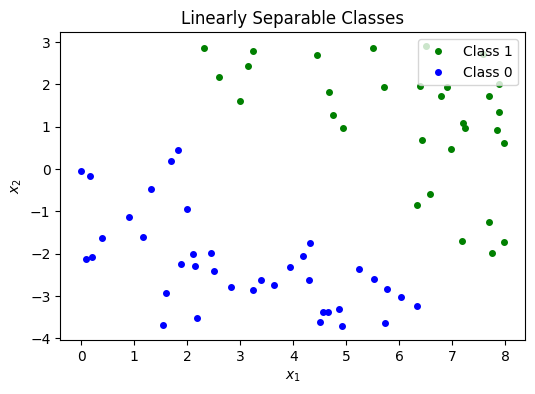

In [5]:
plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 4, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 4, label = 'Class 0')
plt.title('Linearly Separable Classes')
plt.legend(loc = 1)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

$$
\begin{align*}
\omega &= \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix} \qquad
x = \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T\\ \vdots \\ \left(x^{(m)}\right)^T \end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)}\\\vdots & \vdots & \vdots \\ 1 & x_1^{(m)} & x_2^{(m)}\end{bmatrix} \qquad
y = \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ y^{(3)}\\ \vdots \\ y^{(m)} \end{bmatrix}
\end{align*}$$

<br>

In [6]:
X1 = np.hstack([np.ones([C1.shape[0],1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([C0.shape[0],1]), x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

In [7]:
X0.shape

(38, 3)

<br>

$$\omega = \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix} \qquad  \omega \leftarrow \omega + yx \qquad $$where $(x, y)$ is a misclassified training point

<br>

In [8]:
w = np.ones([3,1])
w = np.asmatrix(w)

n_iter = y.shape[0]
for k in range(n_iter):
    for i in range(n_iter):
        if y[i,0] != np.sign(X[i,:]*w)[0,0]:
            w += y[i,0]*X[i,:].T

print(w)

[[-27.        ]
 [  8.91616645]
 [ 20.9833523 ]]


<br>

$$
\begin{align*}
f(x) &= \omega_0 + \omega^Tx  = \omega_0 + \omega_1x_1 + \omega_2x_2  = 0  \qquad ----> \qquad  x_2 = -\frac{\omega_1}{\omega_2} x_1 - \frac{\omega_0}{\omega_2}
\end{align*}
$$
<br>

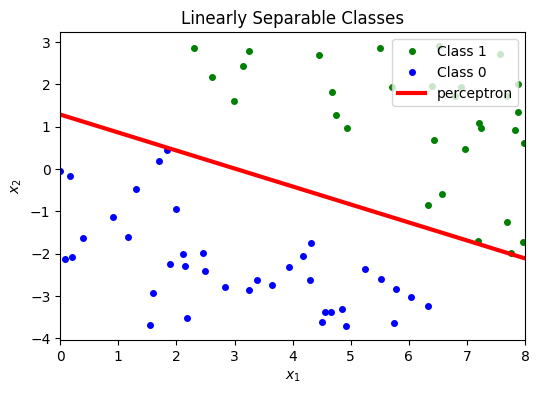

In [9]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 4, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 4, label = 'Class 0')
plt.plot(x1p, x2p, c = 'r', linewidth = 3, label = 'perceptron')
plt.title('Linearly Separable Classes')
plt.xlim([0, 8])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 1)
plt.show()


<br>

__Perceptron using Scikit-Learn__

<br><br>

$$
\begin{align*}
x &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T\\ \vdots \\ \left(x^{(m)}\right)^T \end{bmatrix} = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ x_1^{(3)} & x_2^{(3)}\\ \vdots & \vdots \\ x_1^{(m)} & x_2^{(m)}\end{bmatrix} \qquad
y = \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ y^{(3)}\\ \vdots \\ y^{(m)} \end{bmatrix}
\end{align*}$$

<br>

In [10]:
X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

In [11]:
from sklearn import linear_model

clf = linear_model.Perceptron(tol=1e-3)
clf.fit(X, np.ravel(y))

Perceptron()

In [12]:
clf.predict([[3, -2]])

array([-1.])

In [13]:
clf.predict([[6, 2]])

array([1.])

In [14]:
clf.coef_

array([[ 9.1821647 , 18.97573586]])

In [15]:
clf.intercept_

array([-25.])

<br>

$$
\begin{align*}
f(x) &= \omega_0 + \omega^Tx  = \omega_0 + \omega_1x_1 + \omega_2x_2  = 0  \qquad ----> \qquad  x_2 = -\frac{\omega_1}{\omega_2} x_1 - \frac{\omega_0}{\omega_2}
\end{align*}
$$
<br>

In [16]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]
print(w0, w1, w2)

-25.0 9.182164699636287 18.975735862499796


<Figure size 600x400 with 0 Axes>

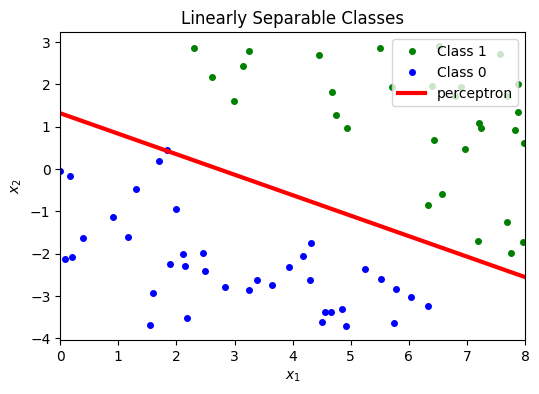

In [17]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w1/w2*x1p - w0/w2

plt.figure(figsize = (6, 4))
plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 4, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 4, label = 'Class 0')
plt.plot(x1p, x2p, c = 'r', linewidth = 3, label = 'perceptron')
plt.title('Linearly Separable Classes')
plt.xlim([0, 8])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 1)
plt.show()


<br>

# <font size='6'><b>Artificial Neural Networks (ANN)
</b>


## Perceptron for $h_{\omega}(x)$


<br>

$$
\begin{align*}
a &= \omega_0 + \omega_1 x_1 + \omega_2 x_2 \\ \\
\hat{y} &= g(a) =
\begin{cases}
1 & a > 0\\
0 & \text{otherwise}
\end{cases}
\end{align*}
$$


<br><br>
<center>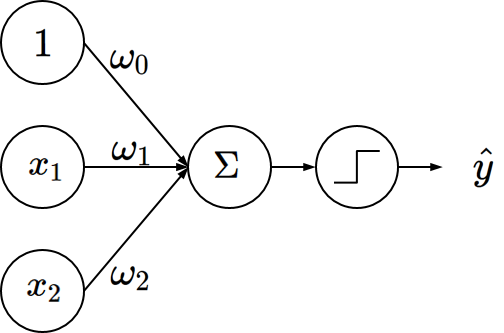</center>

<br>

- Multi-Layer Perceptron (MLP) = Artificial Neural Networks (ANN)

<br><br>
<center>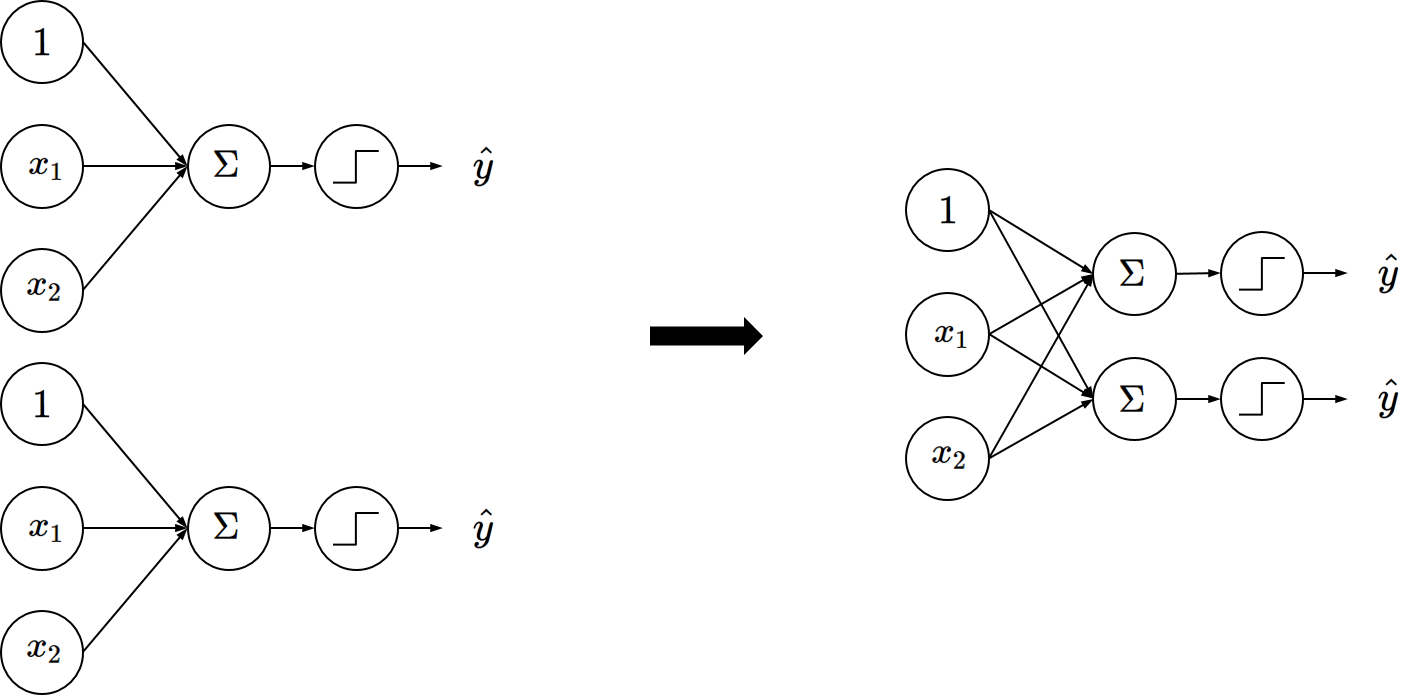</center>
<br><br>

<br>
<center>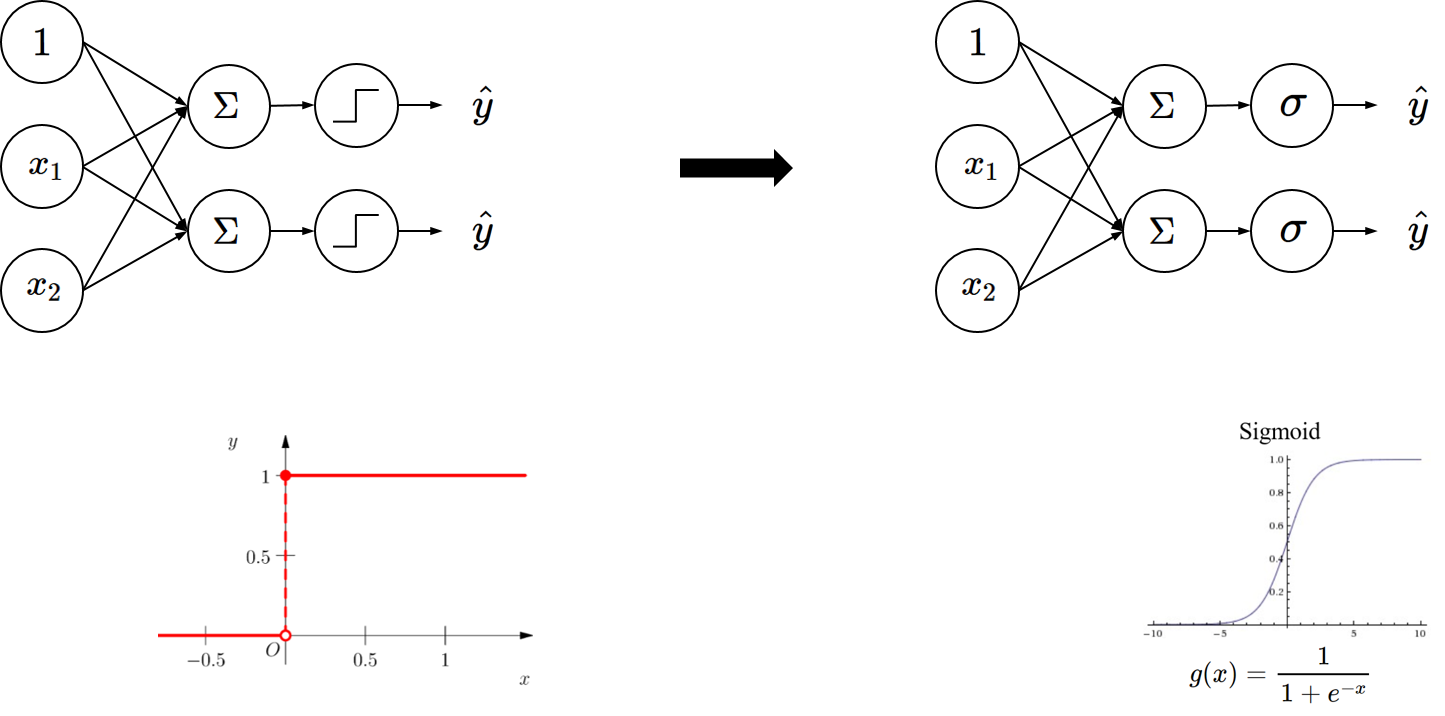</center>
<br><br>

<br>
<center>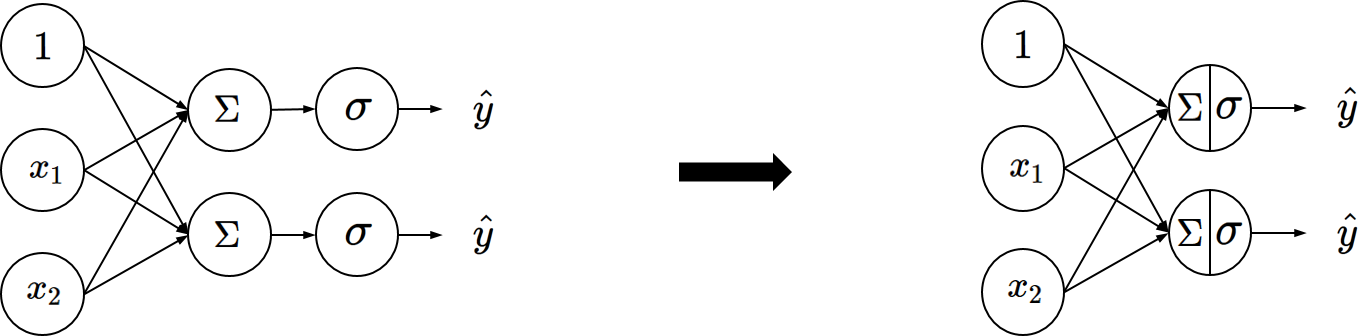</center>

<br>

- Multi-layer perceptron


<br>
<center>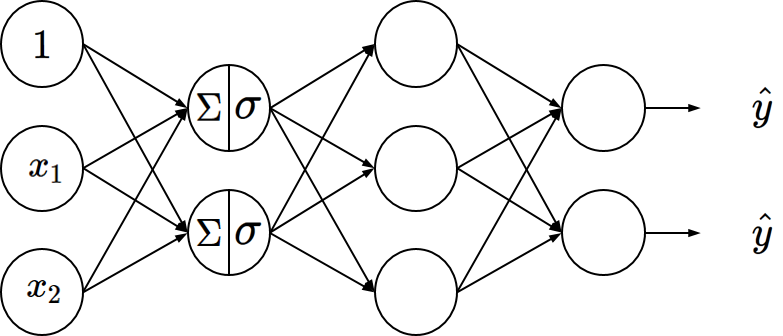</center>

<br>

# ANN에서의 logistic regression

<br>

<br>

- 선형 분리 가능한 logistic regression

<br>

$$
\begin{align*}
y^{(i)} &\in \{0, 1\}\\\\
y &= \sigma (\omega_0 + \omega_1 x_1 + \omega_2 x_2)
\end{align*}
$$

<br>

- 학습 후 선형 분리 경계선(linear classification boundary) :  $\omega_0 + \omega_1 x_1 + \omega_2 x_2 = 0$
<br>

<br>
<center>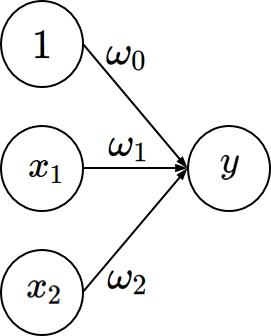</center>
<br><br>

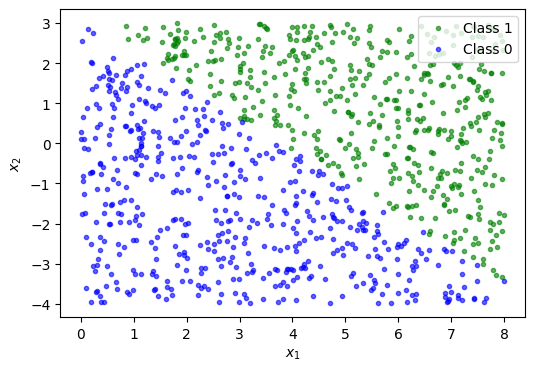

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

#training data gerneration
m = 1000
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4
g = 0.8*x1 + x2 - 3

C1 = np.where(g >= 0)[0]   # g가 true인 인덱스 값을 return
C0 = np.where(g < 0)[0]    # g가 false인 인덱스 값을 return

M = C0.shape[0]
N = C1.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

train_X = np.asmatrix(train_X)
train_y = np.asmatrix(train_y)

X = np.hstack([np.ones([m,1]), train_X])
X = np.asmatrix(X)

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')

plt.legend(loc = 1)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

## Keras

In [20]:
LogisticRegression = tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_dim = 2,
                          units = 1,
                          activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
LogisticRegression.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                           loss = 'binary_crossentropy')

In [22]:
loss = LogisticRegression.fit(train_X, train_y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7464
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4975
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4039
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3528
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3347
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3079
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2935
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2706  
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2527 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2582 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2335 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2160 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2306 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2128 
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

In [23]:
w = LogisticRegression.layers[0].get_weights()[0]
b = LogisticRegression.layers[0].get_weights()[1]

print('Weight w =',w[0], w[1])
print('Bias b =',b)

Weight w = [2.398385] [3.0201902]
Bias b = [-8.892242]


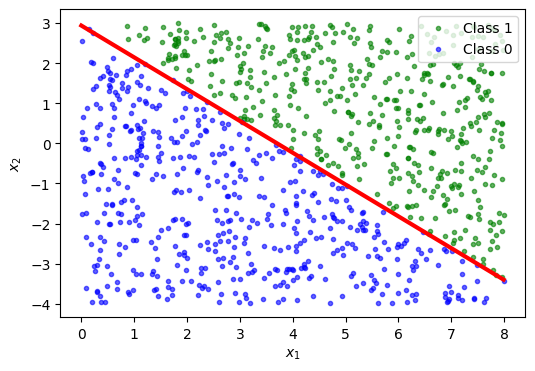

In [24]:
x1p = np.arange(0, 8, 0.01).reshape(-1, 1)
x2p = - w[0,0]/w[1,0]*x1p - b[0]/w[1,0]

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')
plt.plot(x1p, x2p, 'r', linewidth = 3, label = '')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 1)
plt.show()

<br>

## Nonlinear Classification

- 한개의 퍼셉트론으로 해결할 수 없음
- 여러개의 퍼셉트론(Multi-layer perceptron(MLP))을 사용해서 해결
- Weights : $\omega$
- Bias : $b$ = $\omega_0$

<br>

$$y = \sigma(\omega_0 + \omega_1 x_1 + \omega_2 x_2) \quad \longrightarrow \quad y = \sigma(b + \omega_1 x_1 + \omega_2 x_2)$$

<br>

<br>
<center>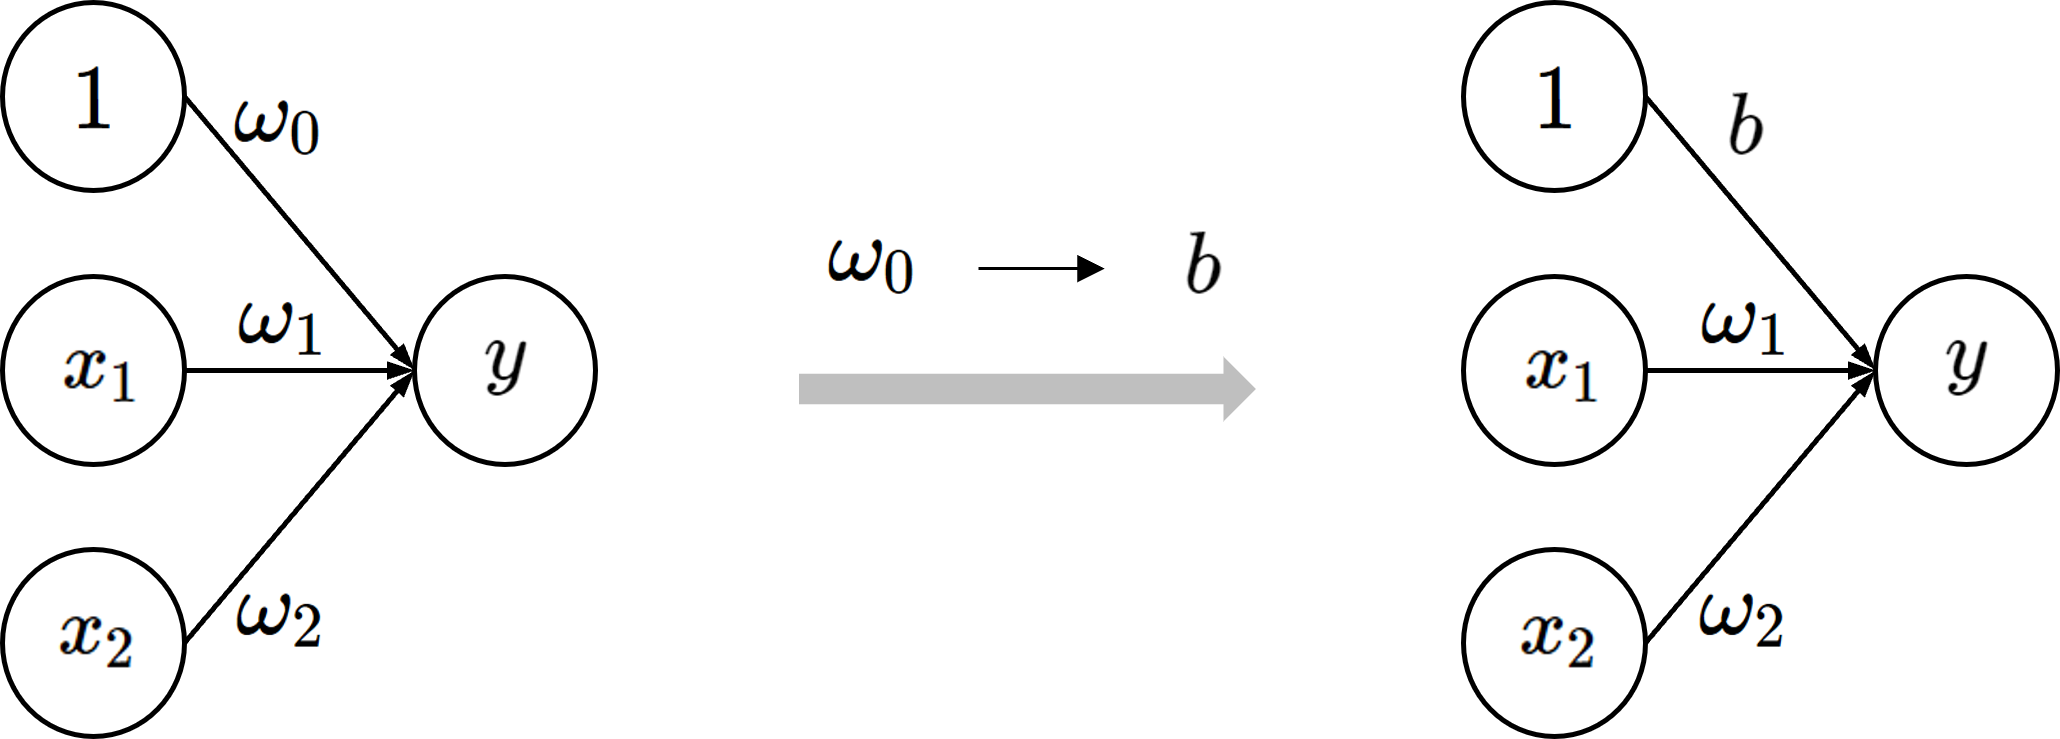</center><br><br>

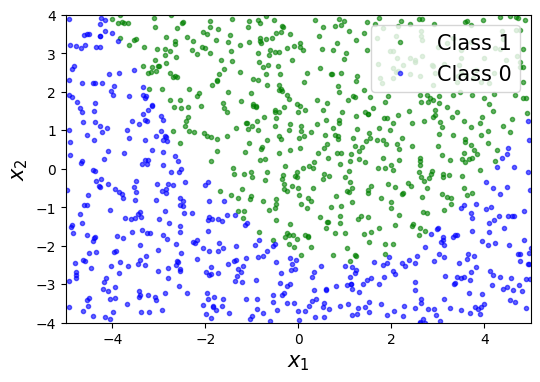

In [25]:
# training data gerneration

m = 1000
x1 = 10*np.random.rand(m, 1) - 5
x2 = 8*np.random.rand(m, 1) - 4

g = - 0.5*(x1-1)**2 + 2*x2 + 5
C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_X = np.asmatrix(train_X)

train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

<br>

- 2개의 퍼셉트론을 사용해서 비직선의 분류경계선(non-linear decision boundary)을 근사화함
- 은닉층(hidden layer) 추가 : 2개의 뉴런과 bias를 가짐

<br>

<center>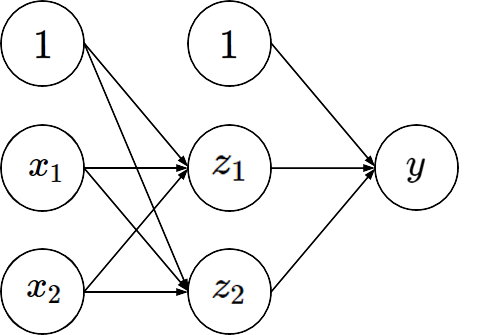</center><br><br>

In [26]:
LogisticRegression = tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_dim = 2, units = 2, activation = 'sigmoid'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

In [27]:
LogisticRegression.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                           loss = 'binary_crossentropy')

In [28]:
loss = LogisticRegression.fit(train_X, train_y, epochs = 10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7882
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5524
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4474
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3628
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3235
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2720
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2292
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1963
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1647
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1690


In [29]:
w1 = LogisticRegression.layers[0].get_weights()[0]
b1 = LogisticRegression.layers[0].get_weights()[1]

w2 = LogisticRegression.layers[1].get_weights()[0]
b2 = LogisticRegression.layers[1].get_weights()[1]

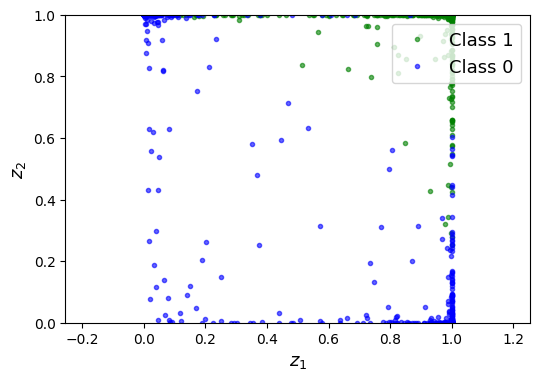

In [30]:
H = train_X*w1 + b1
H = 1/(1 + np.exp(-H))

plt.figure(figsize = (6, 4))
plt.plot(H[0:N,0], H[0:N,1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')
plt.xlabel('$z_1$', fontsize = 13)
plt.ylabel('$z_2$', fontsize = 13)
plt.legend(loc = 1, fontsize = 13)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

<br>

- $z$-공간의 피처 $z_1$ and $z_2$ 는 시그모이드 함수를 사용하기 때문에 $(0,1)$ 사이의 값을 가짐

- Bounded Output Range: 비선형 변환에 의해 입력값과 상관없이 정규화된 출력값을 가짐

- Feature Redistribution: 은닉층은 입력 데이터를 새로운 특징 공간으로 재분배하여 선형적으로 분리될 수 있게 함.

<br>

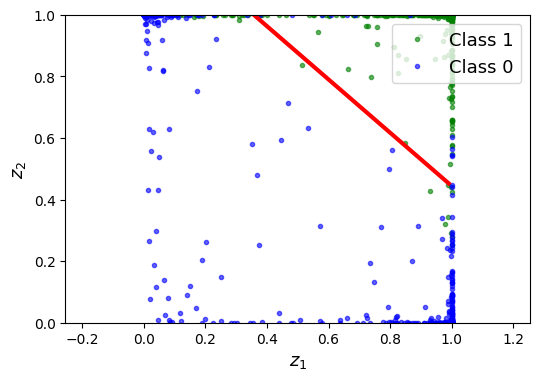

In [31]:
x1p = np.arange(0, 1, 0.01).reshape(-1, 1)
x2p = - w2[0,0]/w2[1,0]*x1p - b2[0]/w2[1,0]

plt.figure(figsize = (6, 4))
plt.plot(H[0:N,0], H[0:N,1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')
plt.plot(x1p, x2p, 'r', linewidth = 3, label = '')
plt.xlabel('$z_1$', fontsize = 13)
plt.ylabel('$z_2$', fontsize = 13)
plt.legend(loc = 1, fontsize = 13)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

<br>

- $z$-공간에서의 선형 경계선 : $z_1$ and $z_2$ 가 입력 데이터를 선형으로 구분하는 특징공간으로 재구성
- 은닉층(hidden layer)는 비선형으로 분포되어 있는 데이터를 고차원 공간으로 투영하여 선형적으로 분리할 수 있도록 함

<br>

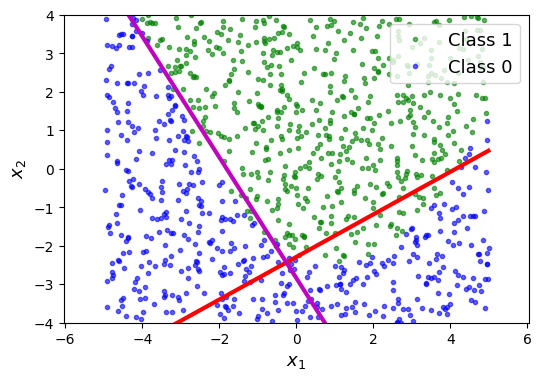

In [32]:
x1p = np.arange(-5, 5, 0.01).reshape(-1, 1)
x2p = - w1[0,0]/w1[1,0]*x1p - b1[0]/w1[1,0]
x3p = - w1[0,1]/w1[1,1]*x1p - b1[1]/w1[1,1]

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')
plt.plot(x1p, x2p, 'r', linewidth = 3, label = '')
plt.plot(x1p, x3p, 'm', linewidth = 3, label = '')
plt.xlabel('$x_1$', fontsize = 13)
plt.ylabel('$x_2$', fontsize = 13)
plt.legend(loc = 1, fontsize = 13)
plt.axis('equal')
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

<br>

- 학습 후, $x$-공간(입력공간)에서 은닉층 뉴런에 의해 형성된 선형경계선(2개의 퍼셉트론)으로 비선형 데이터 구성을 분류할 수 있음

<br>

<br><br>

# ANN with Scikit-learn

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# 데이터 Load
train_x = np.load('/content/drive/MyDrive/Machine Learning실습/ANN_MNIST/mnist_train_images.npy')
train_y = np.load('/content/drive/MyDrive/Machine Learning실습/ANN_MNIST/mnist_train_labels.npy')
test_x = np.load('/content/drive/MyDrive/Machine Learning실습/ANN_MNIST/mnist_test_images.npy')
test_y = np.load('/content/drive/MyDrive/Machine Learning실습/ANN_MNIST/mnist_test_labels.npy')